In [1]:
# 继承
# 继承就是可以获取另外一个类的成员属性和成员方法
#作用增加代码的复用性，节省不必要的重复代码，提高开发效率吧，同时可以设置类与类之间的关系

In [2]:
# 继承的两个概念
# 父类
#用于被继承的类，称为父类，也叫做基类，或者叫超类
#子类
#继承其他类的类，称为子类，也叫做派生类

In [9]:
#单继承
class Father:
    face = '圆脸'
    
    def sound(self):
        print('声音沙哑')

In [12]:
class Son(Father):
    name='张三'
    def sex(self):
        print('girl')

In [11]:
zs=Son()
zs.face

'圆脸'

In [8]:
zs.sound()

声音沙哑


In [13]:
#继承的特征
# 1.所有的类都继承自object类
# 2.子类继承父类可以访问父类当中的所有成员。(私有化的封装排除在外)
# 3.子类继承父类并不会将父类的所有成员都复制到子类当中，访问父类的成员是间接的通过父类访问的
# 4.子类可以有独有的属性和方法
# 5.子类可以重载父类的方法，只需要设置和父类指定成员相同的名称即可，重载之后的成员，子类只会访问当前类的成员，不会调用父类
# 6.子类如果重载了父类，并且还想将父类的方法借调过来使用，可以使用以下方法：
# 父类名.方法()[适合类]   super().方法 [适合对象]

In [14]:
# class MyNN(torch):
#     def __init__(self):
#         super.__init__()

In [15]:
# 单继承
#单继承：每个类只能继承一个类的方式称为单继承
#多继承：每个类可以同时继承多个类的方式称为多继承

In [16]:
#多继承
class Mother:
    face='精致的脸庞'
    def sound(self):
        print('语气温和')
class Father:
    eye = '大眼睛'
    def height(self):
        print('身材修长')

In [18]:
#子类
class Son(Mother,Father):
    pass
zs=Son()

In [19]:
zs.face

'精致的脸庞'

In [20]:
zs.eye

'大眼睛'

In [23]:
#菱形继承/钻石继承
#动物类：
class Animal:
    #成员方法
    def say(self):
        print('Animal张开嘴')
        print('Animal闭上嘴')
#人类
class Human(Animal):
    def say(self):
        print('人类在说话')
        Animal.say(self)
        print('人类说话完毕')
# zs=Human()
# zs.say()
#鸟类
class Bird(Animal):
    def say(self):
        print('鸟类说话')
        Animal.say(self)
        print('鸟类说话完毕')
#鸟人类
class HumanBird(Human,Bird):
    def say(self):
        print('鸟人来说话')
        #调用人类的发言方式
        Human.say(self)
        Bird.say(self)
        print('鸟人类说话完毕')

In [24]:
hm = HumanBird()
hm.say()

鸟人来说话
人类在说话
Animal张开嘴
Animal闭上嘴
人类说话完毕
鸟类说话
Animal张开嘴
Animal闭上嘴
鸟类说话完毕
鸟人类说话完毕


##### 菱形继承的问题
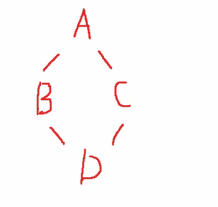
如果BC类同时继承了A类，D类又继承了BC两个类的情况下(菱形继承)<br>
在调用BC中某个同名的方法的时候会导致A类的该方法被多次调用，会产生逻辑问题！

In [25]:
# MRO列表
# 解释： Method Realtion Order 用来制作一个继承关系的列表
#python3 中只用C3计算法来计算MRO列表(计算过程忽略)
#MRO列表的制作原则
# 1.子类永远排在父类的前面
# 2.如果继承了多个父类，那么按照MRO列表中的顺序映射在列表中
# 3.如果多个类继承了一个父类，孙子类中只会选取第一个父类中的该方法.
HumanBird.__mro__

(__main__.HumanBird, __main__.Human, __main__.Bird, __main__.Animal, object)

In [34]:
# super()
# super不是一个关键字，也不是一个函数，它是一个类
# super()的作用不是查找父类，而是查找MRO列表的上一个类
# super()和父类没有任何实质关系，只是有时候可以调用到父类而已

#在单继承的情况下，super()永远调用父类

#菱形继承/钻石继承
#动物类：
class Animal:
    #成员方法
    def say(self):
        print('Animal张开嘴')
        print('Animal闭上嘴')
#人类
class Human(Animal):
    def say(self):
        print('人类在说话')
        super().say()
        print('人类说话完毕')
# zs=Human()
# zs.say()
#鸟类
class Bird(Animal):
    def say(self):
        print('鸟类说话')
        super().say()
        print('鸟类说话完毕')
#鸟人类
class HumanBird(Human,Bird):
    def say(self):
        print('鸟人类说话')
        #调用人类的发言方式
       # super().say()
        super().say()
        print('鸟人类说话完毕')

In [35]:
#是super() 处理后的多继承
HumanBird.__mro__

(__main__.HumanBird, __main__.Human, __main__.Bird, __main__.Animal, object)

In [36]:
hb = HumanBird()
hb.say()

鸟人类说话
人类在说话
鸟类说话
Animal张开嘴
Animal闭上嘴
鸟类说话完毕
人类说话完毕
鸟人类说话完毕
